importing libraries

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn import metrics
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading Data

In [ ]:
drive.mount('/content/drive',force_remount=True)
path= "/content/drive/My Drive/creditcard/creditcard.csv"
data= pd.read_csv(path)

Mounted at /content/drive


Data Exploration

In [ ]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
data.isnull().sum()*100/data.isnull().count()

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

There are some missing values in the data

Filling the missing values with mean

In [ ]:
data.loc[:,'CREDIT_LIMIT']=data.loc[:,'CREDIT_LIMIT'].fillna(data.loc[:,'CREDIT_LIMIT'].mean())
data.loc[:,'MINIMUM_PAYMENTS']=data.loc[:,'MINIMUM_PAYMENTS'].fillna(data.loc[:,'MINIMUM_PAYMENTS'].mean())

Excluding the data that is not much needed for building the model

In [ ]:
data=data.drop(['CUST_ID'],axis=1)

Feature Selection


Standardizing the data

In [ ]:
sc= StandardScaler()
data_sd=sc.fit_transform(data)

Dimensionality Reduction with PCA

In [ ]:
pca=PCA(0.8)
data_pca=pca.fit_transform(data_sd)
np.cumsum(pca.explained_variance_ratio_)

array([0.27290037, 0.47592029, 0.56384008, 0.63863983, 0.70126775,
       0.75876986, 0.80764221])

In [ ]:
pca=PCA(n_components=7)
data_pca_updated=pca.fit_transform(data_sd)

Dimensionality Reduction with t-SNE 

---



In [ ]:
perplexity_list=[10,20,30,40,60,70]
tsne_results=[]
for p in perplexity_list:
  tsne=TSNE(n_components=2,perplexity=p,verbose=0,n_iter=300)
  tsne_results.append(tsne.fit_transform(data_sd))
  

Dimensionality reduction with UMAP

In [ ]:
n_neighbors=[2,3,4,5]
min_dist=[0.1,0.3,0.5,1]
umap_results=[]
for i,x in zip(n_neighbors, min_dist):
  umap_results.append(umap.UMAP(n_neighbors=i,
                      min_dist=x,
                      metric='correlation').fit_transform(data_sd))

Applying elbow method to find the optimal number of clusters for Kmeans Clustering

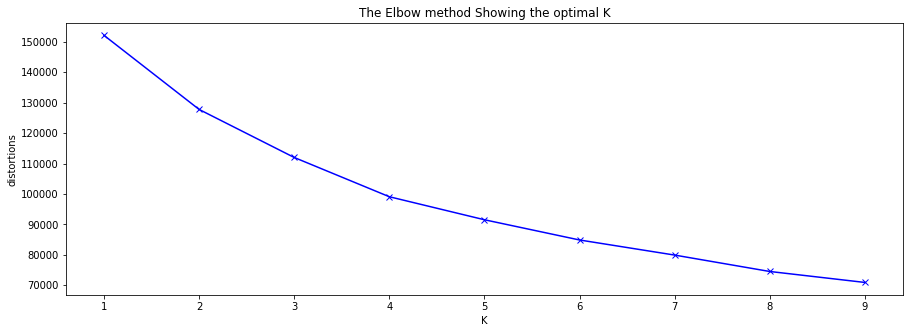

In [ ]:
distortions=[]
K=range(1,10)
for k in K:
  kmeanModel=KMeans(n_clusters=k)
  kmeanModel.fit(data_sd)
  distortions.append(kmeanModel.inertia_)


plt.figure(figsize=(15,5))
plt.plot(K,distortions,'bx-')
plt.xlabel('K')
plt.ylabel('distortions')
plt.title('The Elbow method Showing the optimal K')
plt.show()

Applying Kmeans with standardized data, data applied to Dimensionality reduction methods PCA,t-SNE,UMAP

Kmeans Clustering with PCA

0.2515298693947977


Text(0.5, 1.0, 'Kmeans Clustering with PCA')

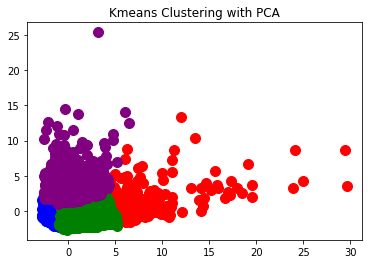

In [ ]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(data_pca_updated)
print(metrics.silhouette_score(data_pca, labels, metric='euclidean'))
plt.scatter(data_pca_updated[labels==0, 0], data_pca_updated[labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data_pca_updated[labels==1, 0], data_pca_updated[labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data_pca_updated[labels==2, 0], data_pca_updated[labels==2, 1], s=100, c='green', label ='Cluster 1')
plt.scatter(data_pca_updated[labels==3, 0], data_pca_updated[labels==3, 1], s=100, c='purple', label ='Cluster 2')  
plt.title('Kmeans Clustering with PCA')

Kmeans clustering with t-SNE

0.35612342
0.36458668
0.36127475
0.36648253
0.36700273


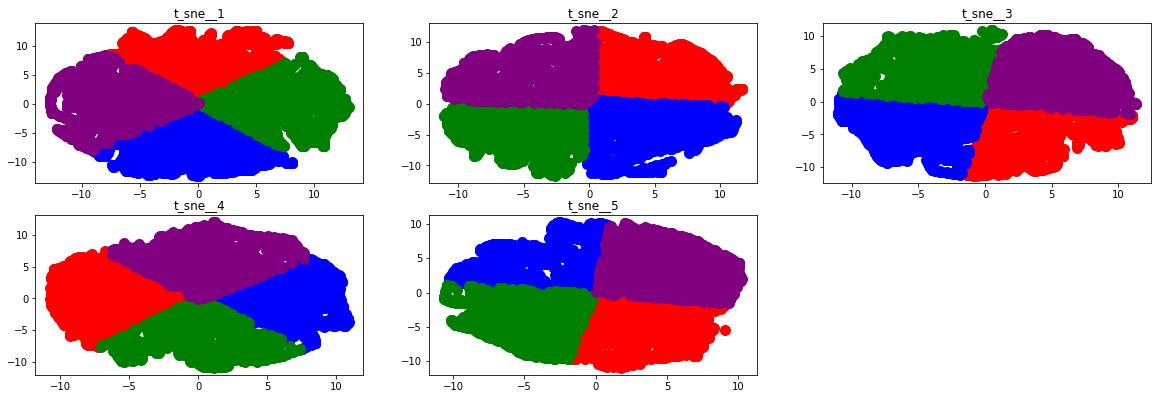

In [ ]:
labels=[]
k=1
plt.figure(figsize=(20,10))
for i,j,x in zip(range(0,5),range(0,5),range(1,6)):
  labels.append(KMeans(n_clusters=4, random_state=123).fit_predict(tsne_results[i]))
  print(metrics.silhouette_score(tsne_results[i], labels[j], metric='euclidean'))
  plt.subplot(3,3,k)
  plt.scatter(tsne_results[i][labels[j]==0, 0], tsne_results[i][labels[j]==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(tsne_results[i][labels[j]==1, 0], tsne_results[i][labels[j]==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(tsne_results[i][labels[j]==2, 0], tsne_results[i][labels[j]==2, 1], s=100, c='green', label ='Cluster 2')
  plt.scatter(tsne_results[i][labels[j]==3, 0], tsne_results[i][labels[j]==3, 1], s=100, c='purple', label ='Cluster 3')
  plt.title("t_sne__"+str(x),fontsize=12)
  k+=1



Kmeans clustering with UMAP

0.027481642
0.06060892
0.12842265
0.15651618


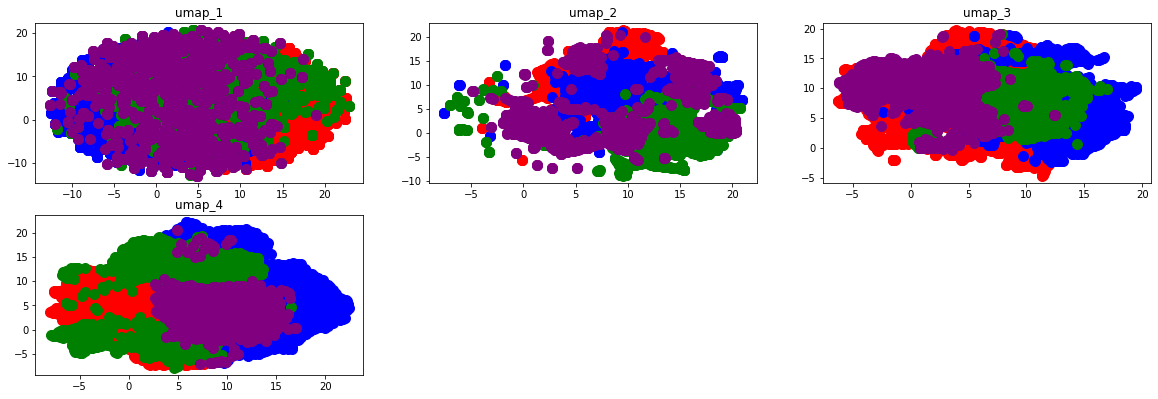

In [ ]:
labels_list=[]
k=1
plt.figure(figsize=(20,10))
for i,j,x in zip(range(0,5),range(0,4),range(1,6)):
  labels.append(KMeans(n_clusters=4, random_state=123).fit_predict(umap_results[i]))
  print(metrics.silhouette_score(umap_results[i], labels[j], metric='euclidean'))
  plt.subplot(3,3,k)
  plt.scatter(umap_results[i][labels[j]==0, 0], umap_results[i][labels[j]==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(umap_results[i][labels[j]==1, 0], umap_results[i][labels[j]==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(umap_results[i][labels[j]==2, 0], umap_results[i][labels[j]==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(umap_results[i][labels[j]==3, 0], umap_results[i][labels[j]==3, 1], s=100, c='purple', label ='Cluster 4')
  labels_list.append(labels[j])
  plt.title("umap_"+str(x),fontsize=12)
  k+=1


In [ ]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS"]


Heirarchical Clustering with PCA

Linkage = Average

silhouette score: 0.8375443839864587


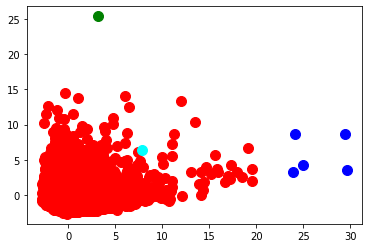

In [ ]:
agg_cluster_pca=AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=4)
predict=agg_cluster_pca.fit_predict(data_pca_updated)
plt.scatter(data_pca_updated[predict==0, 0], data_pca_updated[predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data_pca_updated[predict==1, 0], data_pca_updated[predict==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data_pca_updated[predict==2, 0], data_pca_updated[predict==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data_pca_updated[predict==3, 0], data_pca_updated[predict==3, 1], s=100, c='cyan', label ='Cluster 4')
print("silhouette score:",metrics.silhouette_score(data_pca_updated,predict,metric='euclidean'))

Heirarchical Clustering with PCA Linkage=Complete

silhouette score: 0.6551692474488482


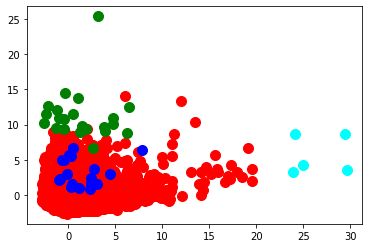

In [ ]:
agg_cluster_pca=AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=4)
predict=agg_cluster_pca.fit_predict(data_pca_updated)
plt.scatter(data_pca_updated[predict==0, 0], data_pca_updated[predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data_pca_updated[predict==1, 0], data_pca_updated[predict==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data_pca_updated[predict==2, 0], data_pca_updated[predict==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data_pca_updated[predict==3, 0], data_pca_updated[predict==3, 1], s=100, c='cyan', label ='Cluster 3')
print("silhouette score:",metrics.silhouette_score(data_pca_updated,predict,metric='euclidean'))

Heirarchical Clustering using PCA Linkage=Ward

silhouette score: 0.16607504352961397


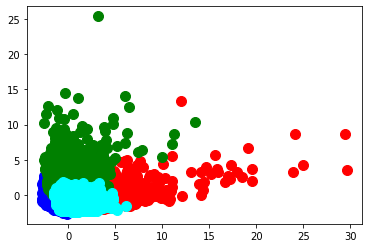

In [ ]:
agg_cluster_pca=AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=4)
predict=agg_cluster_pca.fit_predict(data_pca_updated)
plt.scatter(data_pca_updated[predict==0, 0], data_pca_updated[predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(data_pca_updated[predict==1, 0], data_pca_updated[predict==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(data_pca_updated[predict==2, 0], data_pca_updated[predict==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(data_pca_updated[predict==3, 0], data_pca_updated[predict==3, 1], s=100, c='cyan', label ='Cluster 3')
print("silhouette score:",metrics.silhouette_score(data_pca_updated,predict,metric='euclidean'))

Heirarchical Clustering with t-SNE
Linkage=average

linkage='average,silhouette score: 0.304959
linkage='average,silhouette score: 0.31351542
linkage='average,silhouette score: 0.32220334
linkage='average,silhouette score: 0.2947947
linkage='average,silhouette score: 0.2979448
linkage='average,silhouette score: 0.31467494


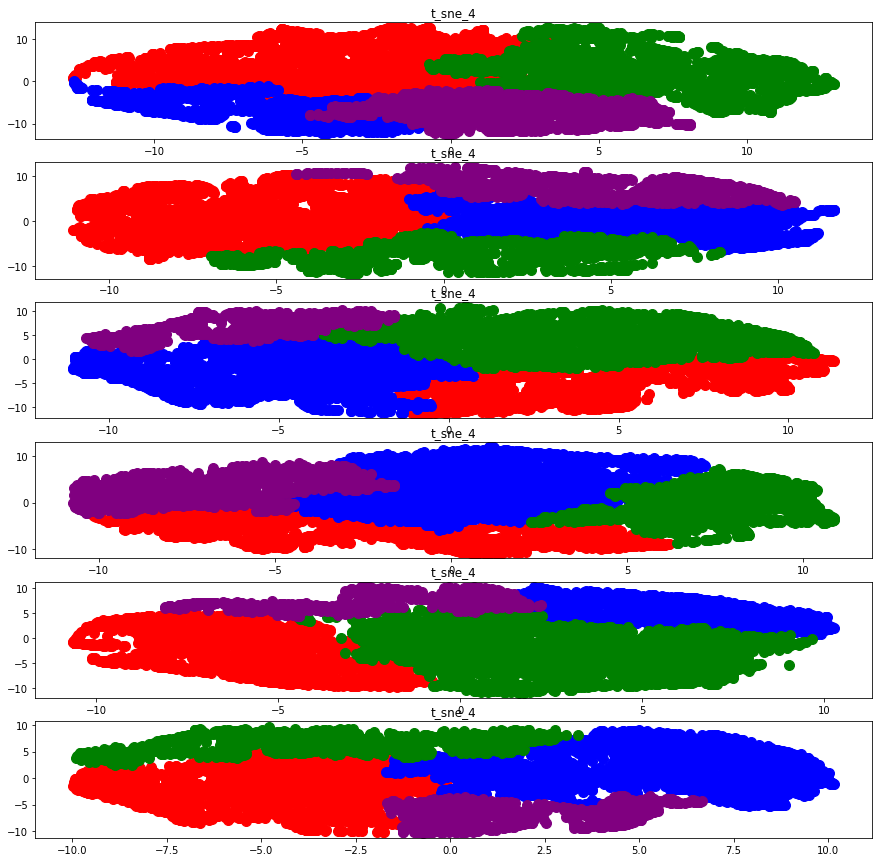

In [ ]:
plt.figure(figsize=(15,15))
k=1
for i in range(0,6):
  agg_cluster=AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=4)
  labels=agg_cluster.fit_predict(tsne_results[i])
  plt.subplot(6,1,k)
  plt.scatter(tsne_results[i][labels==0, 0], tsne_results[i][labels==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(tsne_results[i][labels==1, 0], tsne_results[i][labels==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(tsne_results[i][labels==2, 0], tsne_results[i][labels==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(tsne_results[i][labels==3, 0], tsne_results[i][labels==3, 1], s=100, c='purple', label ='Cluster 4')
  plt.title("t_sne_"+str(x),fontsize=12)
  print("linkage='average,silhouette score:",metrics.silhouette_score(tsne_results[i],labels,metric='euclidean'))
  k+=1

Heirarchical clustering with t-SNE

Linkage=complete

linkage='complete',silhouette score: 0.2527754
linkage='complete',silhouette score: 0.28257072
linkage='complete',silhouette score: 0.32749632
linkage='complete',silhouette score: 0.25447738
linkage='complete',silhouette score: 0.32132152
linkage='complete',silhouette score: 0.3034691


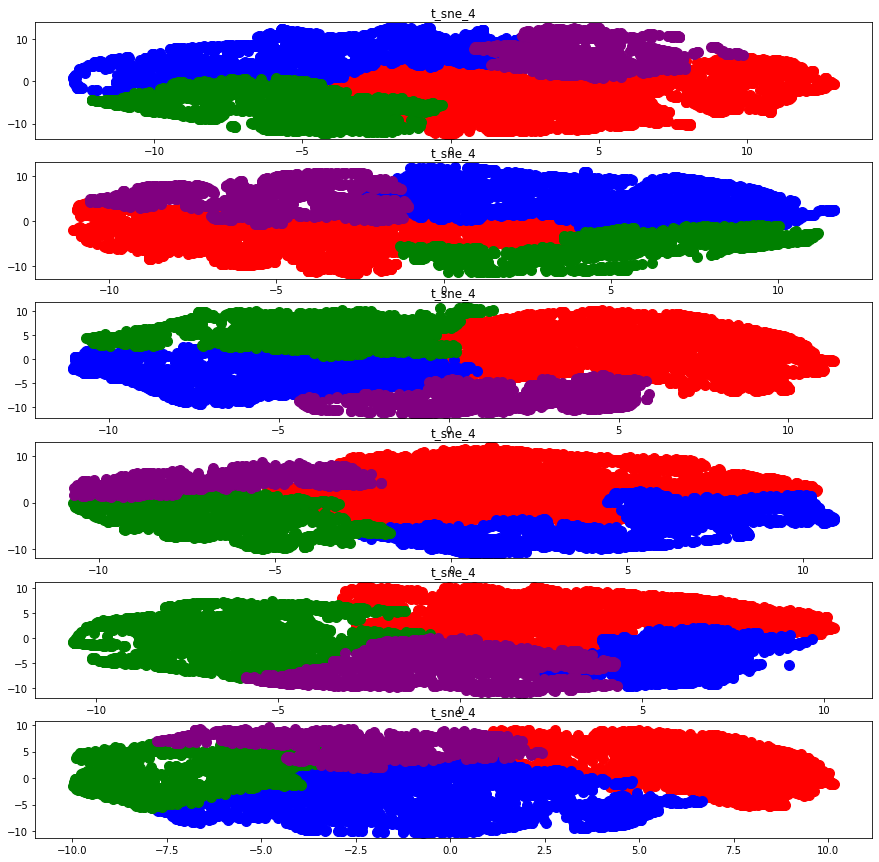

In [ ]:
plt.figure(figsize=(15,15))
k=1
for i in range(0,6):
  agg_cluster=AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=4)
  labels=agg_cluster.fit_predict(tsne_results[i])
  plt.subplot(6,1,k)
  plt.scatter(tsne_results[i][labels==0, 0], tsne_results[i][labels==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(tsne_results[i][labels==1, 0], tsne_results[i][labels==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(tsne_results[i][labels==2, 0], tsne_results[i][labels==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(tsne_results[i][labels==3, 0], tsne_results[i][labels==3, 1], s=100, c='purple', label ='Cluster 4')
  plt.title("t_sne_"+str(x),fontsize=12)
  print("linkage='complete',silhouette score:",metrics.silhouette_score(tsne_results[i],labels,metric='euclidean'))
  k+=1



Heirarchical Clustering with t-SNE
Linkage=ward

linkage='ward',silhouette score: 0.32111123
linkage='ward',silhouette score: 0.28401628
linkage='ward',silhouette score: 0.29877546
linkage='ward',silhouette score: 0.33326063
linkage='ward',silhouette score: 0.32843265
linkage='ward',silhouette score: 0.30921006


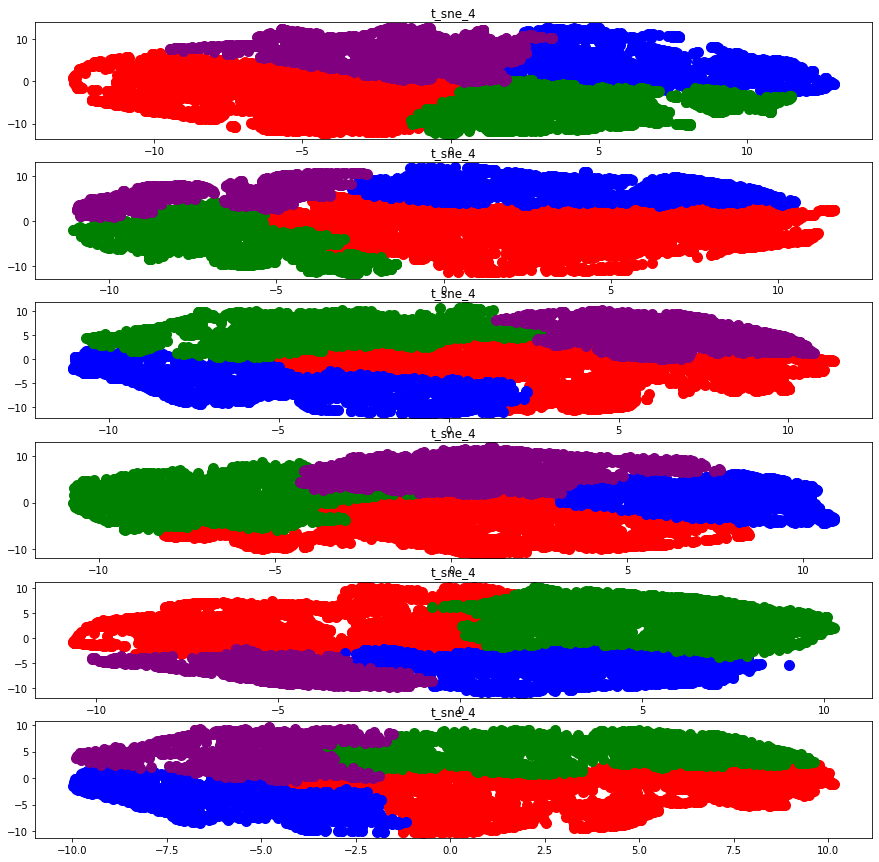

In [ ]:
plt.figure(figsize=(15,15))
k=1
for i in range(0,6):
  agg_cluster=AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=4)
  labels=agg_cluster.fit_predict(tsne_results[i])
  plt.subplot(6,1,k)
  plt.scatter(tsne_results[i][labels==0, 0], tsne_results[i][labels==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(tsne_results[i][labels==1, 0], tsne_results[i][labels==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(tsne_results[i][labels==2, 0], tsne_results[i][labels==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(tsne_results[i][labels==3, 0], tsne_results[i][labels==3, 1], s=100, c='purple', label ='Cluster 4')
  plt.title("t_sne_"+str(x),fontsize=12)
  print("linkage='ward',silhouette score:",metrics.silhouette_score(tsne_results[i],labels,metric='euclidean'))
  k+=1

Heirarchical Clustering using UMAP

linkage=average

linkage='ward',silhouette score: -0.029299347
linkage='ward',silhouette score: 0.06650349
linkage='ward',silhouette score: 0.0142916385
linkage='ward',silhouette score: 0.12546195


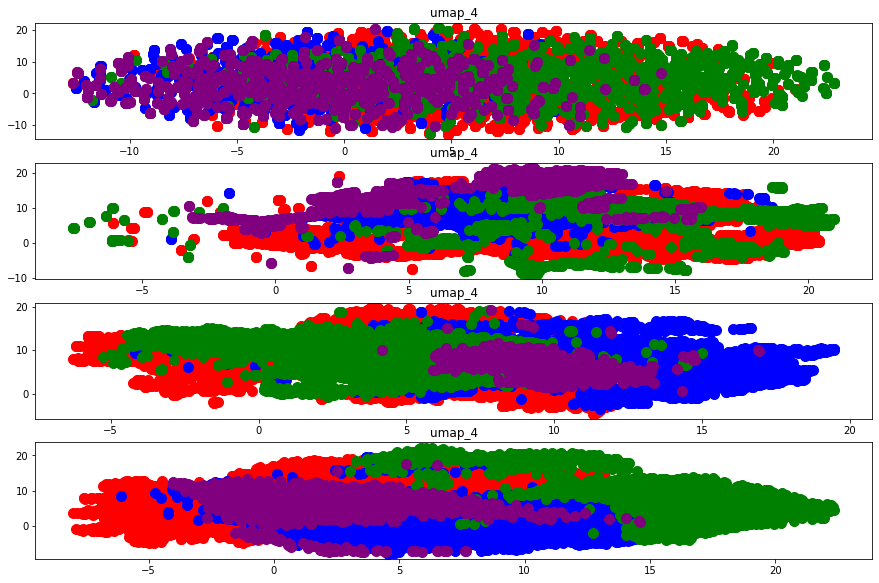

In [ ]:
plt.figure(figsize=(15,15))
k=1
for i in range(0,4):
  agg_cluster=AgglomerativeClustering(linkage='average',affinity='euclidean',n_clusters=4)
  labels=agg_cluster.fit_predict(tsne_results[i])
  plt.subplot(6,1,k)
  plt.scatter(umap_results[i][labels==0, 0], umap_results[i][labels==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(umap_results[i][labels==1, 0], umap_results[i][labels==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(umap_results[i][labels==2, 0], umap_results[i][labels==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(umap_results[i][labels==3, 0], umap_results[i][labels==3, 1], s=100, c='purple', label ='Cluster 4')
  plt.title("umap_"+str(x),fontsize=12)
  print("linkage='ward',silhouette score:",metrics.silhouette_score(umap_results[i],labels,metric='euclidean'))
  k+=1

Heirarchical Clustering with umap
linkage=complete

linkage='ward',silhouette score: -0.018820506
linkage='ward',silhouette score: 0.0659337
linkage='ward',silhouette score: 0.13167761
linkage='ward',silhouette score: 0.10130446


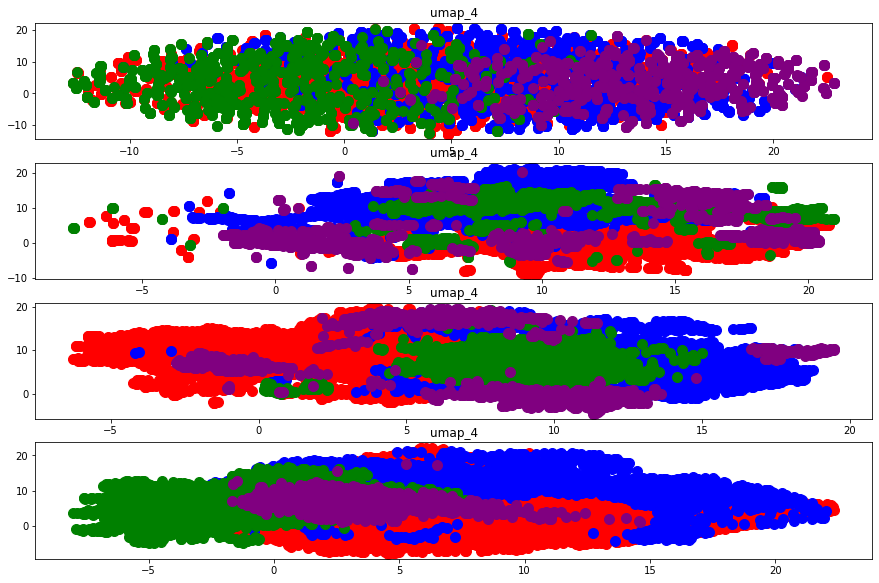

In [ ]:
plt.figure(figsize=(15,15))
k=1
for i in range(0,4):
  agg_cluster=AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=4)
  labels=agg_cluster.fit_predict(tsne_results[i])
  plt.subplot(6,1,k)
  plt.scatter(umap_results[i][labels==0, 0], umap_results[i][labels==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(umap_results[i][labels==1, 0], umap_results[i][labels==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(umap_results[i][labels==2, 0], umap_results[i][labels==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(umap_results[i][labels==3, 0], umap_results[i][labels==3, 1], s=100, c='purple', label ='Cluster 4')
  plt.title("umap_"+str(x),fontsize=12)
  print("linkage='ward',silhouette score:",metrics.silhouette_score(umap_results[i],labels,metric='euclidean'))
  k+=1

Heirarchical Clustering with umap Linkage=ward

linkage='ward',silhouette score: -0.022201106
linkage='ward',silhouette score: 0.13960929
linkage='ward',silhouette score: 0.045382287
linkage='ward',silhouette score: 0.10152582


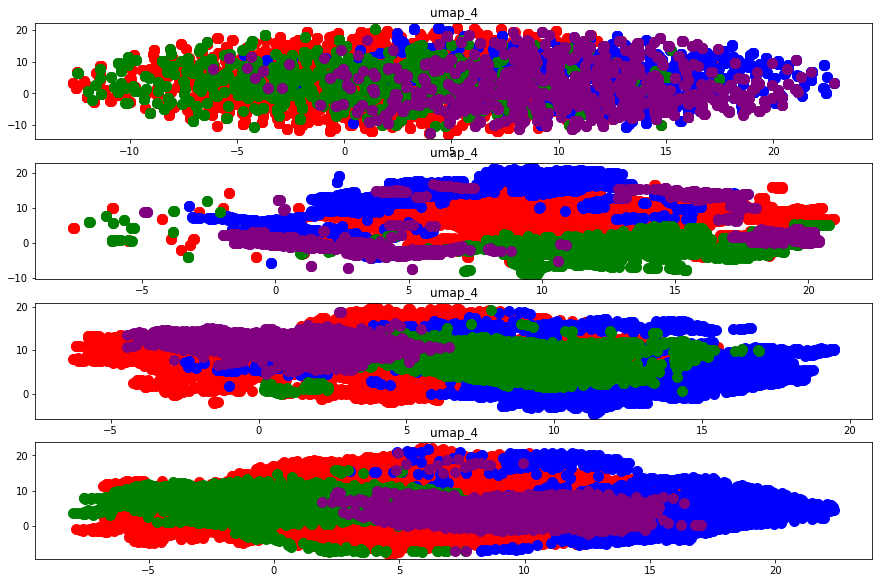

In [ ]:
plt.figure(figsize=(15,15))
k=1
for i in range(0,4):
  agg_cluster=AgglomerativeClustering(linkage='ward',affinity='euclidean',n_clusters=4)
  labels=agg_cluster.fit_predict(tsne_results[i])
  plt.subplot(6,1,k)
  plt.scatter(umap_results[i][labels==0, 0], umap_results[i][labels==0, 1], s=100, c='red', label ='Cluster 1')
  plt.scatter(umap_results[i][labels==1, 0], umap_results[i][labels==1, 1], s=100, c='blue', label ='Cluster 2')
  plt.scatter(umap_results[i][labels==2, 0], umap_results[i][labels==2, 1], s=100, c='green', label ='Cluster 3')
  plt.scatter(umap_results[i][labels==3, 0], umap_results[i][labels==3, 1], s=100, c='purple', label ='Cluster 4')
  plt.title("umap_"+str(x),fontsize=12)
  print("linkage='ward',silhouette score:",metrics.silhouette_score(umap_results[i],labels,metric='euclidean'))
  k+=1

DBSCAN using PCA

DBSCAN:1,silhouette score:-0.30174857153323686
DBSCAN:2,silhouette score:-0.5121169805623204
DBSCAN:3,silhouette score:-0.13290327095671492
DBSCAN:4,silhouette score:0.43386608231084556
DBSCAN:5,silhouette score:0.7210275840726736
DBSCAN:6,silhouette score:0.7716961490553992
DBSCAN:7,silhouette score:0.7818764647118951
DBSCAN:8,silhouette score:0.8122883237431601


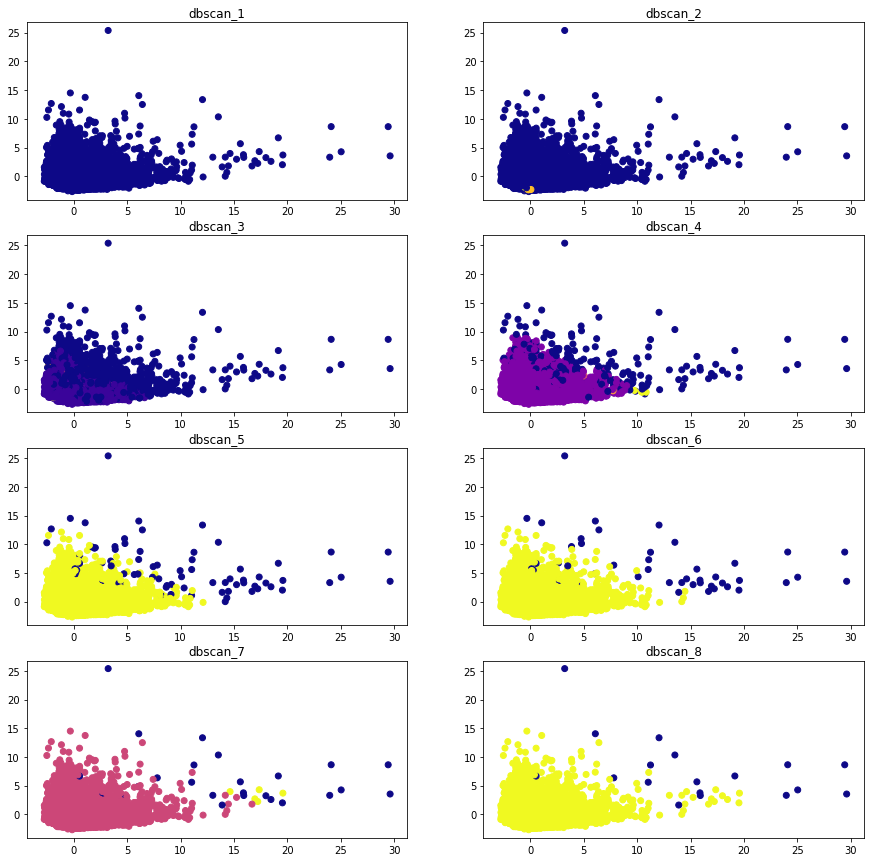

In [ ]:
clusters_list=[]
i=1
plt.figure(figsize=(15,15))
for j,k in zip([0.01,0.1,1,2,3,4,5,6],range(2,10)):
  dbscan=DBSCAN(eps=j,min_samples=k)
  labels=dbscan.fit_predict(data_pca_updated)
  plt.subplot(4,2,i)
  plt.scatter(data_pca_updated[:, 0], data_pca_updated[:, 1], c=labels, cmap="plasma")
  clusters_list.append(labels)
  print("DBSCAN:{},silhouette score:{}".format(i,metrics.silhouette_score(data_pca_updated,labels,metric='euclidean')))
  plt.title("dbscan_"+str(i),fontsize=12)
  i+=1

DBSCAN USING t-SNE

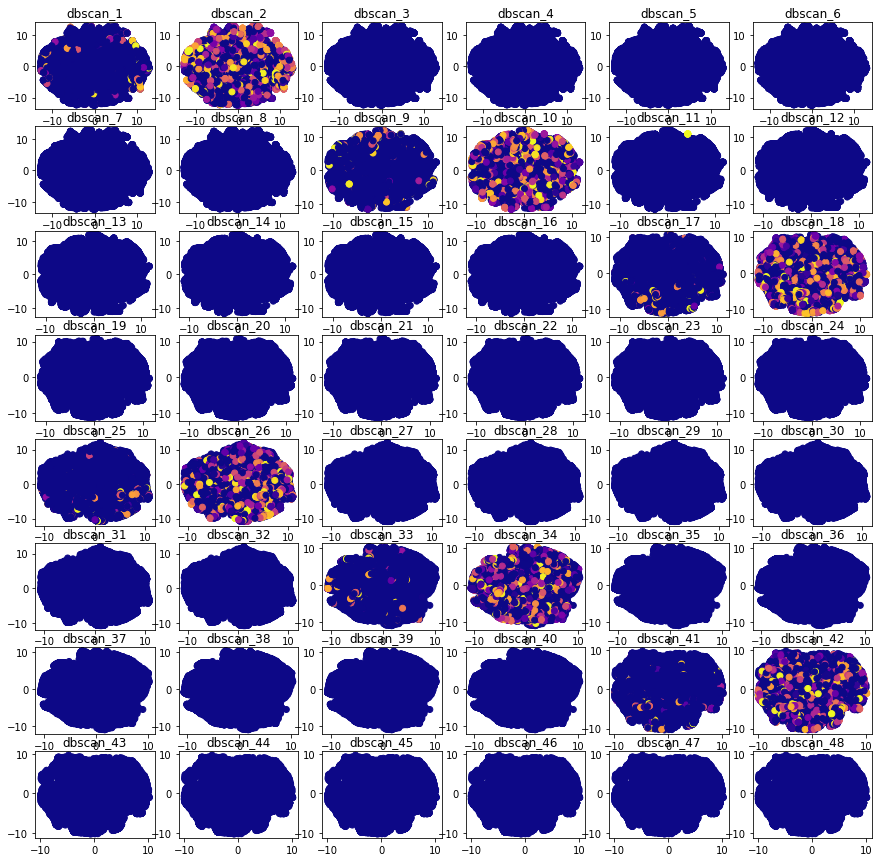

In [ ]:
predictions_list=[]
j=1
plt.figure(figsize=(15,15))
for i in range(0,6):
  for k,l in zip([0.01,0.1,1,2,3,4,5,6],range(2,10)):
    dbscan=DBSCAN(eps=k,min_samples=l)
    labels=dbscan.fit_predict(tsne_results[i])
    plt.subplot(8,6,j)
    plt.scatter(tsne_results[i][:, 0], tsne_results[i][:, 1], c=labels, cmap="plasma")
    predictions_list.append(labels)
    plt.title("dbscan_"+str(j),fontsize=12)
    j+=1

DBSCAN using UMAP

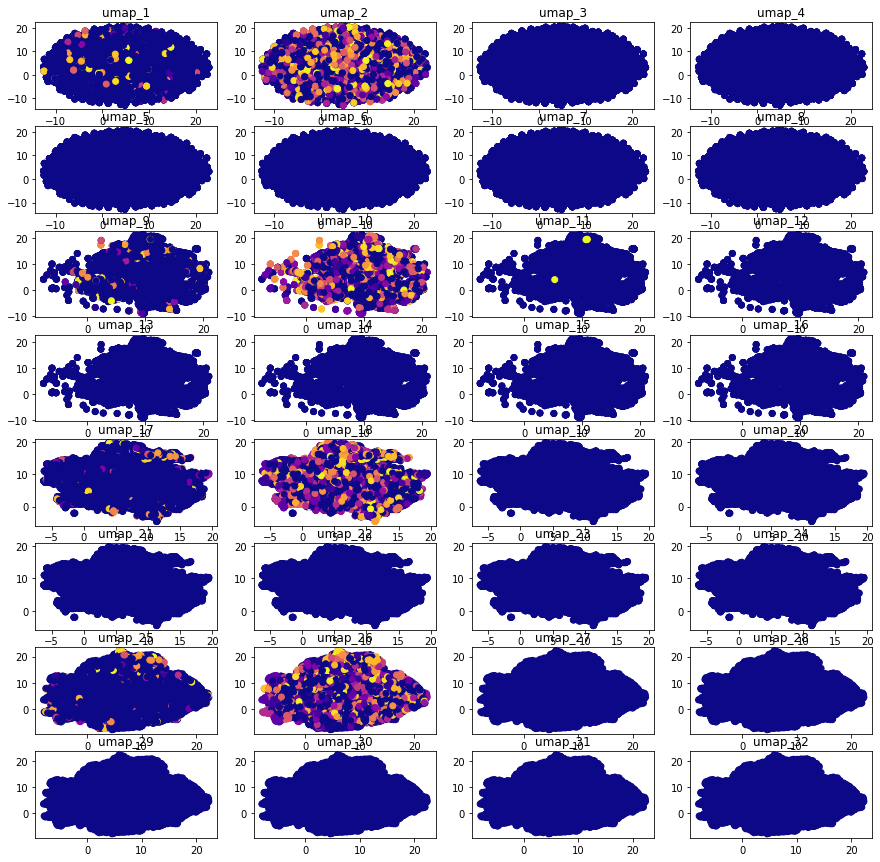

In [ ]:
labels=[]
j=1
plt.figure(figsize=(15,15))
for i in range(0,4):
  for k,l in zip([0.01,0.1,1,2,3,4,5,6],range(2,10)):
    dbscan=DBSCAN(eps=k,min_samples=l)
    labels=dbscan.fit_predict(tsne_results[i])
    plt.subplot(8,4,j)
    plt.scatter(umap_results[i][:, 0], umap_results[i][:, 1], c=labels, cmap="plasma")
    plt.title("umap_"+str(j),fontsize=12)
    j+=1

Gausian Mixture Using PCA

number of components :2
0.2397964420838414
number of components :3
0.1368532131038757
number of components :4
0.081764301509238
number of components :5
0.05617890449118205
number of components :6
0.037596502128146754
number of components :7
0.03668390184631
number of components :8
0.021823555832513032
number of components :9
-0.006881224657383088


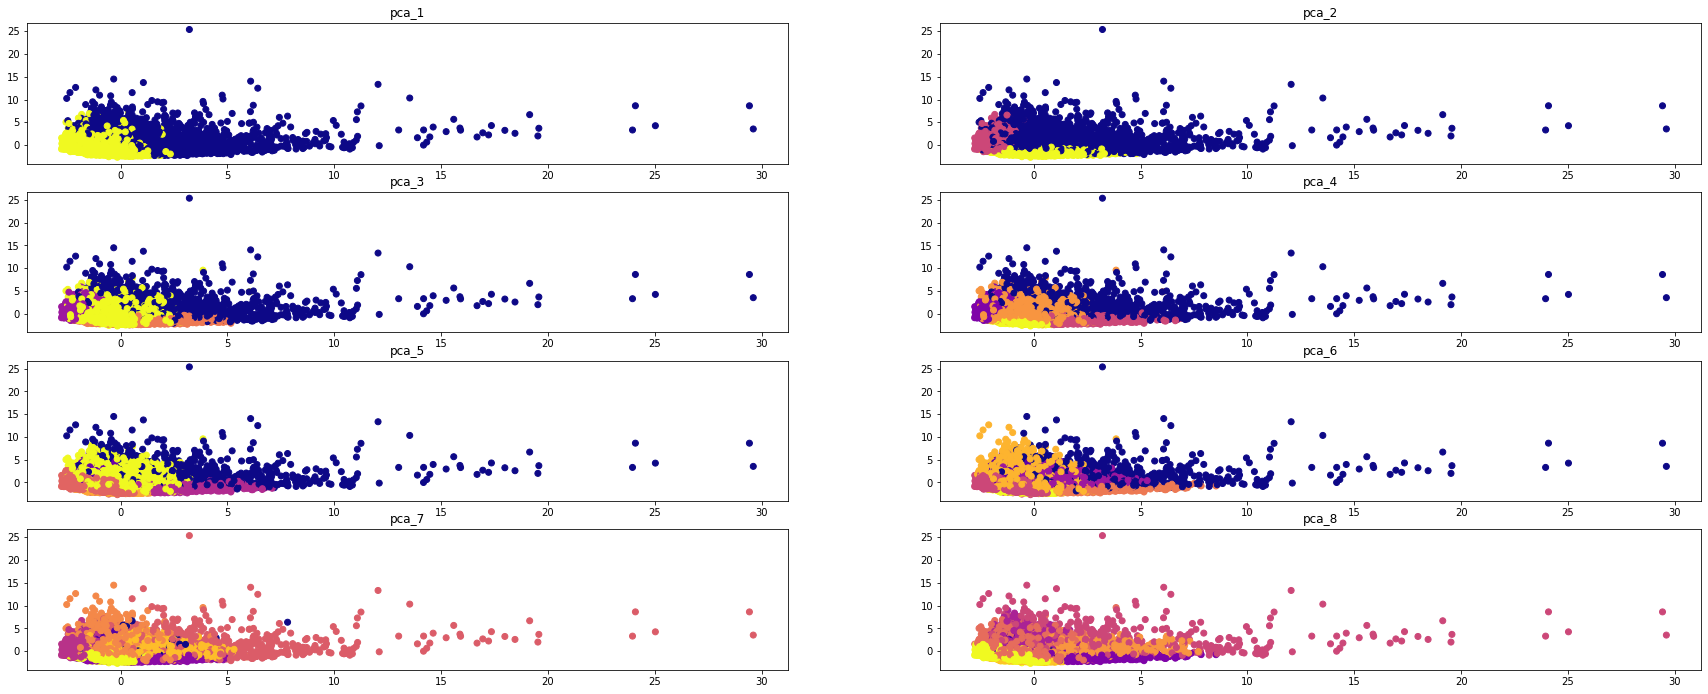

In [ ]:
k=1
plt.figure(figsize=(30,15))
for component in range(2,10):
  print("number of components :{}".format(component))
  gmm_cluster = GaussianMixture(n_components=component, random_state=123)
  labels=gmm_cluster.fit_predict(data_pca_updated)
  plt.subplot(5,2,k)
  plt.scatter(data_pca_updated[:, 0], data_pca_updated[:, 1], c=labels, cmap="plasma")
  plt.title("pca_"+str(k),fontsize=12)
  print(metrics.silhouette_score(data_pca_updated,labels,metric='euclidean'))
  k+=1

GAUSSIAN MIXTURE USING t-SNE

number of components :2
0.33107084
number of components :3
0.3615278
number of components :4
0.34531185
number of components :5
0.31769282
number of components :6
0.35038263
number of components :7
0.35318312
number of components :8
0.34239572
number of components :9
0.33617085
number of components :2
0.35081142
number of components :3
0.37423536
number of components :4
0.3548265
number of components :5
0.34232908
number of components :6
0.3260654
number of components :7
0.35628438
number of components :8
0.3495762
number of components :9
0.3209697
number of components :2
0.32489362
number of components :3
0.3803619
number of components :4
0.35018376
number of components :5
0.34291357
number of components :6
0.3058871
number of components :7
0.36295232
number of components :8
0.3480846
number of components :9
0.30727157
number of components :2
0.32928228
number of components :3
0.38423508
number of components :4
0.3575199
number of components :5
0.35195622
number of components :6
0.388

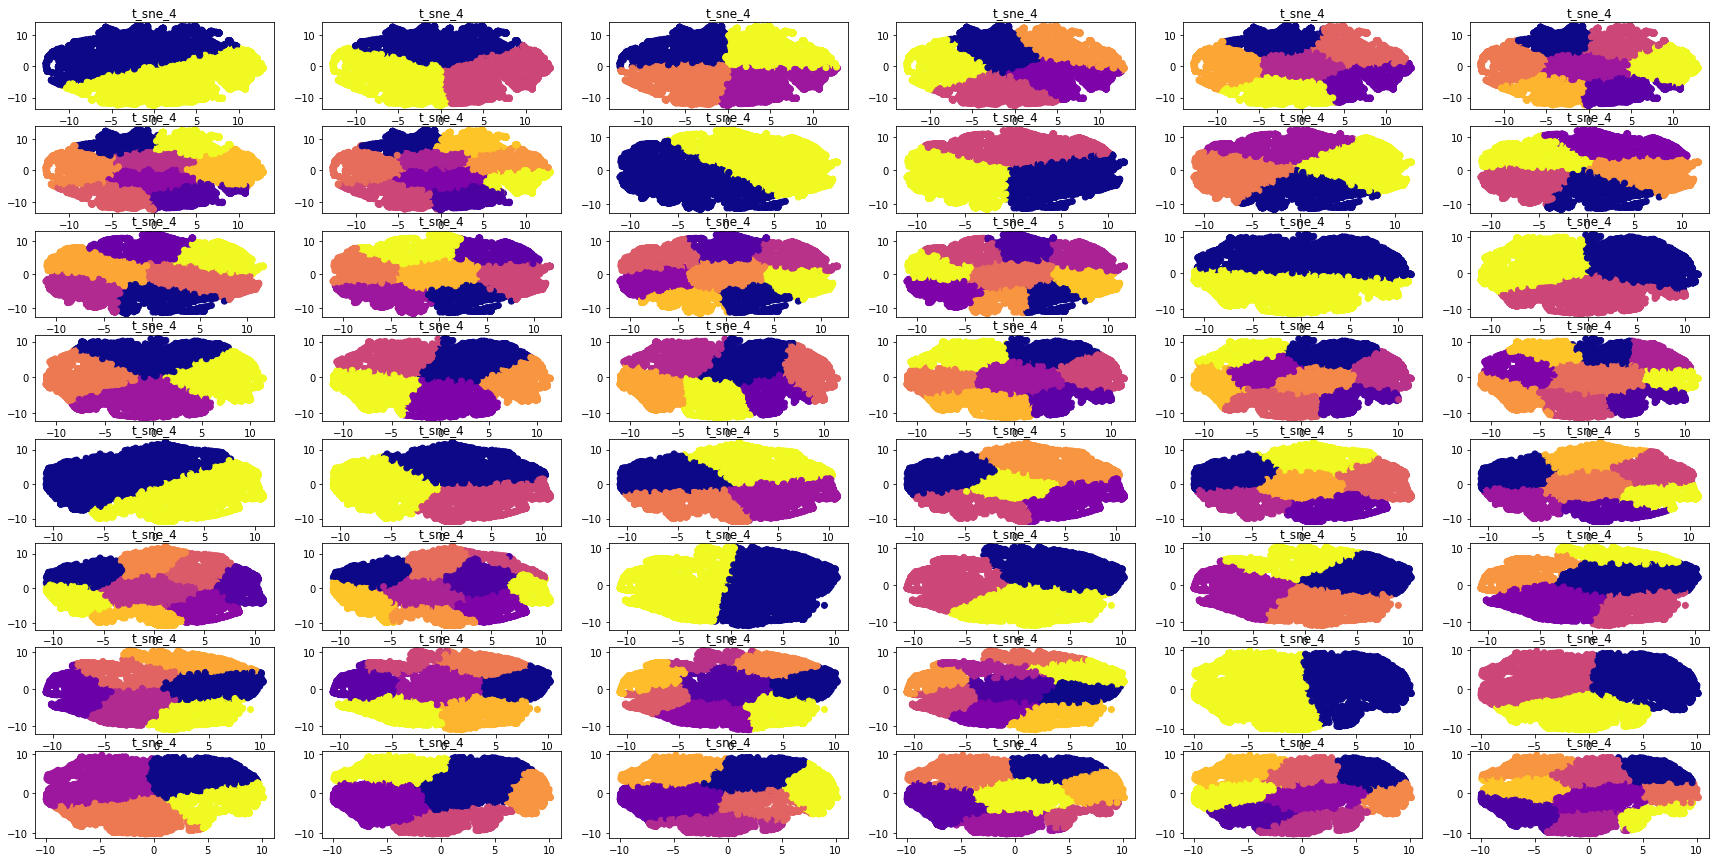

In [ ]:
labels=[]
k=1
plt.figure(figsize=(30,15))
for i in range(0,6):
  for component in range(2,10):
    print("number of components :{}".format(component))
    gmm_cluster = GaussianMixture(n_components=component, random_state=123)
    labels=gmm_cluster.fit_predict(tsne_results[i])
    plt.subplot(8,6,k)
    plt.scatter(tsne_results[i][:, 0], tsne_results[i][:, 1], c=labels, cmap="plasma")
    plt.title("t_sne_"+str(x),fontsize=12)
    print(metrics.silhouette_score(tsne_results[i],labels,metric='euclidean'))
    k+=1

Gausian Mixture Model with UMAP

number of components :2
umap_1,silhouette score:0.34257030487060547
number of components :3
umap_2,silhouette score:0.361817330121994
number of components :4
umap_3,silhouette score:0.3431025743484497
number of components :5
umap_4,silhouette score:0.32828378677368164
number of components :6
umap_5,silhouette score:0.31217920780181885
number of components :7
umap_6,silhouette score:0.3464527726173401
number of components :8
umap_7,silhouette score:0.3305422067642212
number of components :9
umap_8,silhouette score:0.33188876509666443
number of components :2
umap_9,silhouette score:0.38964399695396423
number of components :3
umap_10,silhouette score:0.38034990429878235
number of components :4
umap_11,silhouette score:0.3497745394706726
number of components :5
umap_12,silhouette score:0.395241379737854
number of components :6
umap_13,silhouette score:0.3588252663612366
number of components :7
umap_14,silhouette score:0.34384414553642273
number of components :8
umap_15,silhouette score:0.3

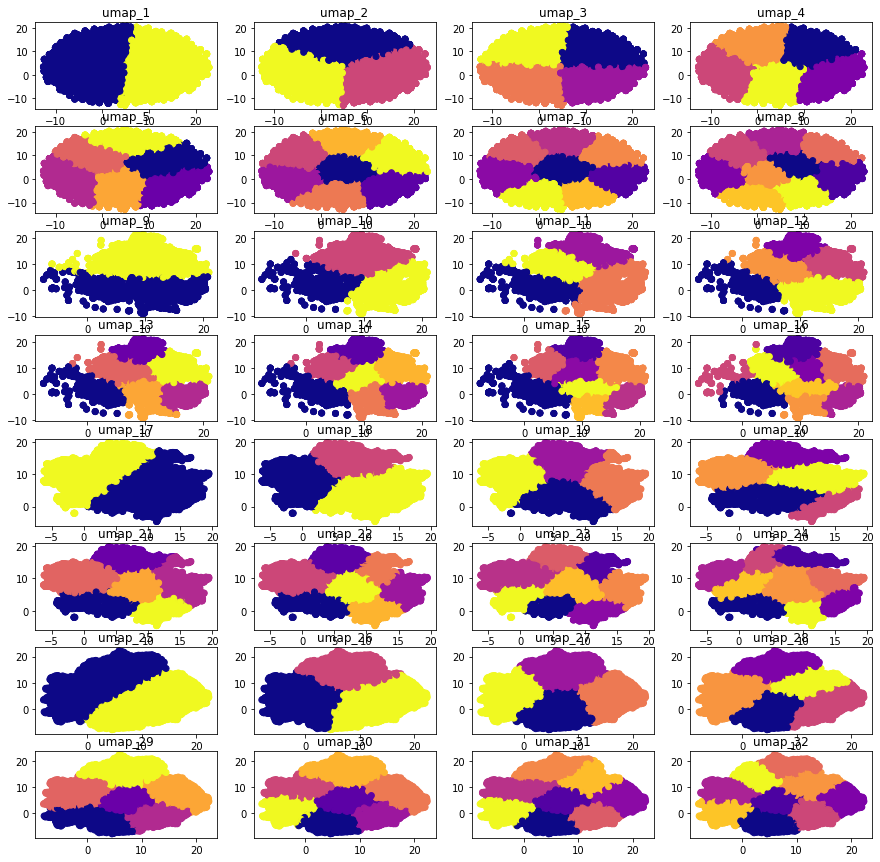

In [ ]:
predicts_list=[]
k=1
plt.figure(figsize=(15,15))
for i in range(0,4):
  for component in range(2,10):
    print("number of components :{}".format(component))
    gmm_cluster = GaussianMixture(n_components=component, random_state=123)
    labels=gmm_cluster.fit_predict(umap_results[i])
    plt.subplot(8,4,k)
    plt.scatter(umap_results[i][:, 0], umap_results[i][:, 1], c=labels, cmap="plasma")
    predicts_list.append(labels)
    plt.title("umap_"+str(k),fontsize=12)
    print('umap_{},silhouette score:{}'.format(k,metrics.silhouette_score(umap_results[i],labels,metric='euclidean')))
    k+=1

In [ ]:
np.unique(predicts_list[17])

array([0, 1, 2])

Data Exploration

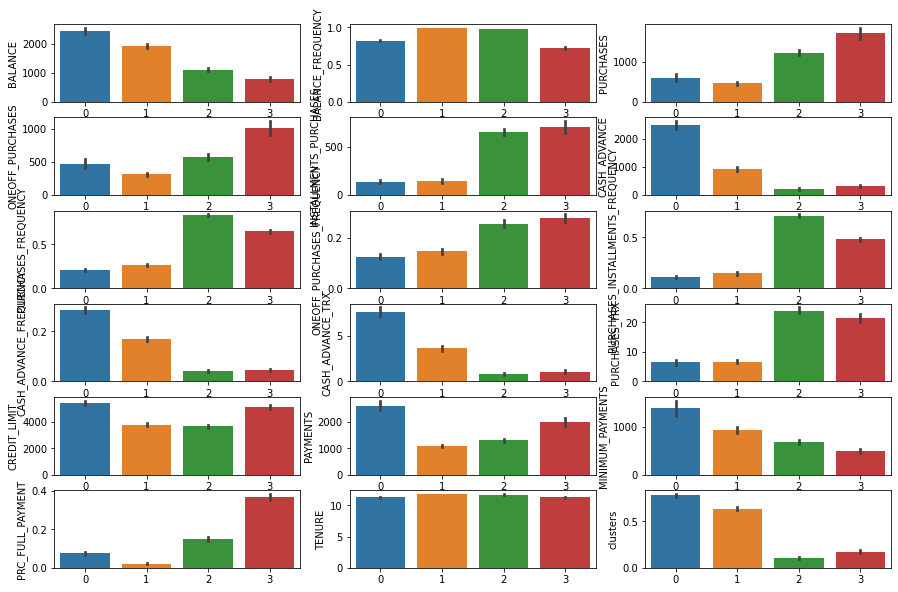

In [ ]:
data['clusters']=predicts_list[16]
#sns.set(rc={'figure.figsize':(1,15)})
plt.figure(figsize=(15,10))
for i,col in enumerate (data.columns):
  plt.subplot(6,3,i+1)
  sns.barplot(x=predicts_list[2], y=data[col])

In [ ]:
np.unique(predicts_list[17])

array([0, 1, 2])

In [ ]:
predicts_list[17][2]

2

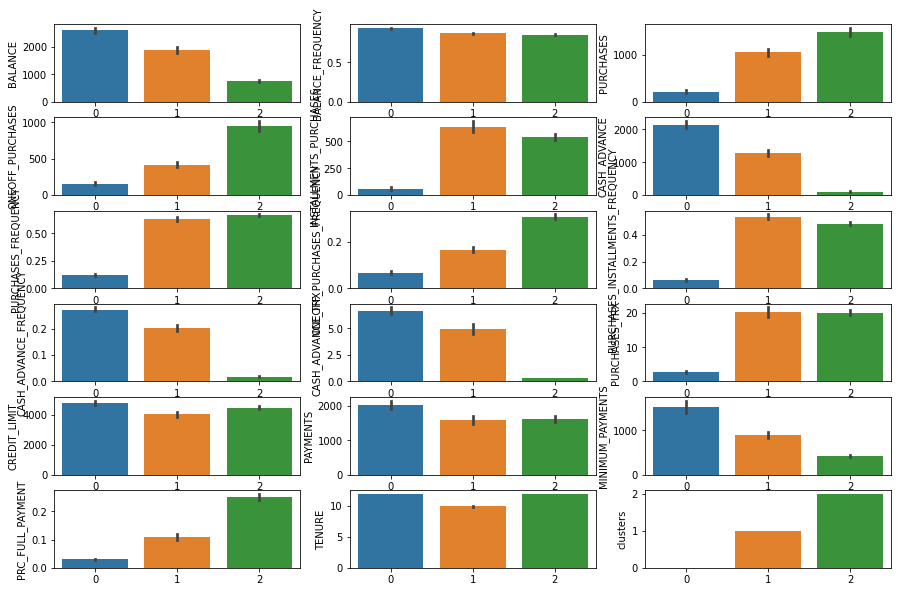

In [ ]:
data['clusters']=predicts_list[17]

#sns.set(rc={'figure.figsize':(1,15)})
plt.figure(figsize=(15,10))
for i,col in enumerate (data.columns):
  plt.subplot(6,3,i+1)
  sns.barplot(x=predicts_list[17], y=data[col])

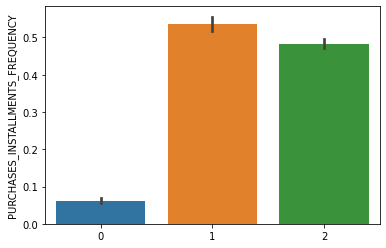

In [ ]:
sns.barplot(x=predicts_list[17],y=data['PURCHASES_INSTALLMENTS_FREQUENCY'])